In [8]:
df = pd.read_csv('/Users/saumenduroy/Desktop/kaggle/jm1.csv')
obj_list = df.columns[df.dtypes == 'object'].values.tolist()
for l in obj_list:
    df[l] = pd.to_numeric(df[l], errors='coerce')
df["defects"] = df["defects"].astype(int)
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('/Users/saumenduroy/Desktop/kaggle/jm1.csv')
obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)
#data = data.drop('File', axis=1)
X = data.iloc[:,0:]  #independent columns
y = data.iloc[:,-1]    #target column i.e Realbug
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs         Score
9             e  4.130875e+08
11            t  2.294931e+07
5             v  2.171643e+06
4             n  2.466837e+05
18     total_Op  1.481198e+05
19   total_Opnd  9.811583e+04
0           loc  9.153106e+04
12       lOCode  5.650808e+04
20  branchCount  2.441086e+04
17    uniq_Opnd  2.074817e+04


In [36]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Desktop/kaggle/jm1.csv")
imp_features = ['e', 't', 'v', 'n', 'total_Op', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['e', 't', 'v', 'n', 'total_Op']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print(features)
# print(X_train)

# train_dataset = pd.read_csv('/Users/saumenduroy/Desktop/kaggle/jm1.csv')
# test_dataset = pd.read_csv('/Users/saumenduroy/Desktop/kaggle/jm1.csv')






# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
# train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
# train_dataset[outcome] = train_dataset[outcome].cat.codes

# test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
# test_dataset[outcome] = test_dataset[outcome].cat.codes

# X_train = train_dataset.loc[:, features]
# X_test = test_dataset.loc[:, features]

# y_train = train_dataset.loc[:, outcome]
# y_test = test_dataset.loc[:, outcome]

class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [15]:
test_dataset

loc  v(g)  ev(g)  iv(g)      n        v     l      d       i  \
0        1.1   1.4    1.4    1.4    1.3     1.30  1.30   1.30    1.30   
1        1.0   1.0    1.0    1.0    1.0     1.00  1.00   1.00    1.00   
2       72.0   7.0    1.0    6.0  198.0  1134.13  0.05  20.31   55.85   
3      190.0   3.0    1.0    3.0  600.0  4348.76  0.06  17.06  254.87   
4       37.0   4.0    1.0    4.0  126.0   599.12  0.06  17.19   34.86   
...      ...   ...    ...    ...    ...      ...   ...    ...     ...   
10880   18.0   4.0    1.0    4.0   52.0   241.48  0.14   7.33   32.93   
10881    9.0   2.0    1.0    2.0   30.0   129.66  0.12   8.25   15.72   
10882   42.0   4.0    1.0    2.0  103.0   519.57  0.04  26.40   19.68   
10883   10.0   1.0    1.0    1.0   36.0   147.15  0.12   8.44   17.44   
10884   19.0   3.0    1.0    1.0   58.0   272.63  0.09  11.57   23.56   

              e  ...  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  \
0          1.30  ...       2          2        2                  2      1.2   
1          1.00  ...       1          1        1                  1        1   
2      23029.10  ...      51         10        8                  1       17   
3      74202.67  ...     129         29       28                  2       17   
4      10297.30  ...      28          1        6                  0       11   
...         ...  ...     ...        ...      ...                ...      ...   
10880   1770.86  ...      13          0        2                  0       10   
10881   1069.68  ...       5          0        2                  0       12   
10882  13716.72  ...      29          1       10                  0       18   
10883   1241.57  ...       6          0        2                  0        9   
10884   3154.67  ...      13          0        2                  1       12   

       uniq_Opnd total_Op total_Opnd branchCount defects  
0            1.2      1.2        1.2         1.4       0  
1              1        1          1           1       1  
2             36      112         86          13       1  
3            135      329        271           5       1  
4             16       76         50           7       1  
...          ...      ...        ...         ...     ...  
10880         15       30         22           7       0  
10881          8       19         11           3       0  
10882         15       59         44           7       0  
10883          8       21         15           1       0  
10884         14       31         27           5       0  

[10885 rows x 22 columns]

In [37]:


from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [38]:
y_test.value_counts()

0    2619
1     645
Name: defects, dtype: int64

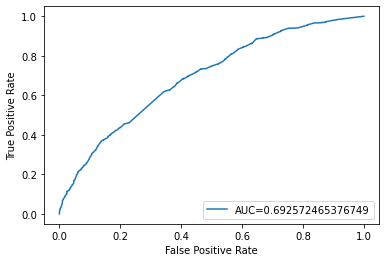

In [39]:
from sklearn import metrics
from matplotlib import pyplot as plt
y_pred_proba = our_rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [28]:
X_test.index.values.tolist()

[10490,
 7211,
 7109,
 5567,
 6677,
 9918,
 5710,
 5265,
 7928,
 33,
 5904,
 4777,
 10194,
 6012,
 1408,
 4722,
 5384,
 9436,
 4250,
 5670,
 10883,
 4307,
 4889,
 1907,
 9466,
 4142,
 2525,
 5276,
 485,
 9025,
 9868,
 3619,
 2823,
 7435,
 8131,
 10651,
 6479,
 8783,
 10252,
 4795,
 7723,
 7283,
 8363,
 7076,
 9450,
 4026,
 7527,
 6447,
 2072,
 347,
 362,
 10689,
 5536,
 8682,
 3148,
 5426,
 3940,
 436,
 2495,
 1196,
 4055,
 1789,
 3788,
 897,
 2589,
 5653,
 9746,
 6617,
 3415,
 2021,
 304,
 7694,
 305,
 4903,
 3236,
 4959,
 9152,
 858,
 8489,
 8120,
 6858,
 702,
 9026,
 5362,
 6161,
 4237,
 5019,
 6392,
 3427,
 2879,
 6486,
 7417,
 10074,
 1597,
 8927,
 7290,
 4015,
 319,
 7486,
 9260,
 3466,
 6913,
 9460,
 2849,
 5068,
 8202,
 8264,
 1284,
 252,
 5355,
 8738,
 10861,
 2537,
 2925,
 6907,
 35,
 8498,
 7352,
 7180,
 6747,
 9519,
 2110,
 2912,
 2688,
 8984,
 3889,
 9888,
 1769,
 7081,
 7631,
 7782,
 95,
 1938,
 1210,
 1747,
 9345,
 10336,
 7664,
 3790,
 8078,
 2612,
 3822,
 1263,
 7673,


## LIME

In [40]:
# Import for LIME
import lime
import lime.lime_tabular

file_to_be_explained = 897

print(f'Explaining {file_to_be_explained} with LIME')

Explaining 897 with LIME


In [41]:
# LIME Step 1 - Construct an explainer
our_lime_explainer = lime.lime_tabular.LimeTabularExplainer(
                            training_data = X_train.values,  
                            mode = 'classification',
                            training_labels = y_train,
                            feature_names = features,
                            class_names = class_labels,
                            discretize_continuous = True)
                            
# LIME Step 2 - Use the constructed explainer with the predict function 
# of your predictive model to explain any instance
lime_local_explanation_of_an_instance = our_lime_explainer.explain_instance(
                           # X_test[0],
                          # data_row = X_test.loc['FileName.py', : ], 
                            data_row = X_test.loc[file_to_be_explained, : ],
                            predict_fn = our_rf_model.predict_proba, 
                            num_features = 5,
                            top_labels = 1)

#explainer = lime_tabular.LimeTabularExplainer(X_train, mode = "regression", feature_names = boston_housing.feature_names)
#explanation = explainer.explain_instance(X_test[0], model.predict, num_features = len(boston_housing.feature_names))
                            
# Please use the code below to visualise the generated LIME explanation.
lime_local_explanation_of_an_instance.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [49]:
lime_local_explanation_of_an_instance.as_map()

{0: [(2, 0.11749498828341162),
  (3, 0.10734741091369437),
  (0, -0.09418945108887435),
  (1, -0.08336010351104799),
  (4, 0.030442442328983094)]}

In [66]:
X_test.loc[file_to_be_explained,:]

CountPath_Max     1032.000000
CountPath_Mean      47.863636
Del_lines            0.000000
Added_lines          0.000000
CountLine          170.000000
Name: lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java, dtype: float64

In [71]:
test_indx_list = X_test.index.tolist()
test_dict={}
for n in test_indx_list:
    exp = our_lime_explainer.explain_instance(X_test.loc[n].values, our_rf_model.predict_proba, num_features=5, top_labels = 1, num_samples = 2500)
    a=exp.as_map()
    test_dict[n] = a
test_dict

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

{'lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java': {1: [(2,
    -0.12455121009290086),
   (3, -0.1052150526803893),
   (0, 0.10268060202920508),
   (1, 0.09367948073886603),
   (4, -0.01929880874555935)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestAnalyzers.java': {1: [(2,
    -0.11876996782339574),
   (3, -0.09986553109122352),
   (0, -0.03993522584701883),
   (4, -0.033589787882596284),
   (1, -0.028305605941246658)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestASCIIFoldingFilter.java': {1: [(4,
    0.22170100315365862),
   (2, -0.12381113057685943),
   (3, -0.11060747873238033),
   (1, 0.0806082393308222),
   (0, 0.07871489277589463)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestCachingTokenFilter.java': {1: [(2,
    -0.1256424018293089),
   (3, -0.09427869990934809),
   (4, -0.08606054836840266),
   (0, -0.04113699506858217),
   (1, -0.02635064753074458)]},
 'lucene/backwards/src/test/org/apache/luc

In [74]:
test_indx_list = X_test.index.tolist()
test_dict={}
for n in test_indx_list:
    exp = our_lime_explainer.explain_instance(X_test.loc[n].values, our_rf_model.predict_proba, num_features=5, top_labels = 1, num_samples = 2500)
    a=exp.as_map()
    test_dict[n] = a
test_dict

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

{'lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java': {0: [(2,
    0.1195612355528048),
   (3, 0.10560691591875318),
   (0, -0.09313908782940493),
   (1, -0.08143452216500278),
   (4, 0.03720452019672879)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestAnalyzers.java': {0: [(2,
    0.1076655479464707),
   (3, 0.10548050864153109),
   (4, 0.04175580041732668),
   (0, 0.029270873265801838),
   (1, 0.01881109725306437)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestASCIIFoldingFilter.java': {0: [(4,
    -0.23316217137561837),
   (2, 0.12312643757324024),
   (3, 0.10312225837583336),
   (0, -0.0941196662330616),
   (1, -0.07489466442226912)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestCachingTokenFilter.java': {0: [(2,
    0.1139985642080217),
   (3, 0.10709290287494042),
   (4, 0.070805282751282),
   (0, 0.04121070129186661),
   (1, 0.03685262555888134)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/T

In [95]:
import csv
with open("file.csv", "w", newline="") as fp:
    # Create a writer object
    writer = csv.DictWriter(fp, fieldnames=test_dict.keys())

    # Write the header row
    writer.writeheader()

    # Write the data rows
    writer.writerow(test_dict)
    print('Done writing dict to a csv file')

Done writing dict to a csv file


In [96]:
import pandas as pd
import ast
df = pd.read_csv("file.csv")
columns = df.columns.values.tolist()
val_cal_0 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
val_cal_1 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
val_cal_count_0 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
val_cal_count_1 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
for col in columns:
#     print(df[col].values.tolist()[0])
    val = ast.literal_eval(df[col].values.tolist()[0])
    if 0 in val.keys():
        dict_val = val[0]
        for i in dict_val:
            index = str(i[0])
            value = i[1]
            val_cal_0[index] += value
            val_cal_count_0[index] +=1
    else:
        dict_val = val[1]
        for i in dict_val:
            index = str(i[0])
            value = i[1]
            val_cal_1[index] += value
            val_cal_count_1[index] +=1
print(val_cal_0)
print(val_cal_count_0)
print(val_cal_1)
print(val_cal_count_1)

{'0': 5.088484645726477, '1': 1.8371661556059797, '2': 86.9433132662648, '3': 203.98715766671484, '4': 44.374170392790056}
{'0': 2607, '1': 2607, '2': 2607, '3': 2607, '4': 2607}
{'0': 7.197018125243167, '1': 5.580436650460818, '2': 11.124735917231188, '3': 5.163721513522769, '4': 32.47894199030552}
{'0': 199, '1': 199, '2': 199, '3': 199, '4': 199}


In [97]:
print("For defective: ")
for i in val_cal_0.keys():
    print("for {}: average is {}".format(i, (val_cal_0[i]/val_cal_count_0[i])))

For defective: 
for 0: average is 0.001951854486277897
for 1: average is 0.000704705084620629
for 2: average is 0.03334994755130986
for 3: average is 0.07824593696460101
for 4: average is 0.017021162406133508


In [98]:
print("For clean: ")
for i in val_cal_1.keys():
    print("for {}: average is {}".format(i, (val_cal_1[i]/val_cal_count_1[i])))

For clean: 
for 0: average is 0.0361659202273526
for 1: average is 0.028042395228446322
for 2: average is 0.05590319556397582
for 3: average is 0.025948349314184768
for 4: average is 0.16321076377037952


In [61]:
# LIME Step 1 - Construct an explainer
our_lime_explainer = lime.lime_tabular.LimeTabularExplainer(
                            training_data = X_train.values,  
                            mode = 'classification',
                            training_labels = y_train,
                            feature_names = features,
                            class_names = class_labels,
                            discretize_continuous = True)
                            
# LIME Step 2 - Use the constructed explainer with the predict function 
# of your predictive model to explain any instance
lime_local_explanation_of_an_instance = our_lime_explainer.explain_instance(
                           # X_test[0],
                          # data_row = X_test.loc['FileName.py', : ], 
                            data_row = X_test.loc[[], : ],
                            predict_fn = our_rf_model.predict_proba, 
                            num_features = 5,
                            top_labels = 1)

#explainer = lime_tabular.LimeTabularExplainer(X_train, mode = "regression", feature_names = boston_housing.feature_names)
#explanation = explainer.explain_instance(X_test[0], model.predict, num_features = len(boston_housing.feature_names))
                            
# Please use the code below to visualise the generated LIME explanation.
lime_local_explanation_of_an_instance.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


## SHAP

In [42]:
# Import libraries for SHAP
import subprocess
import sys
import importlib
import numpy
import shap

file_to_be_explained = 897
file_to_be_explained_idx = list(X_test.index).index(file_to_be_explained)

In [43]:
# explainer = shap.Explainer(our_rf_model, numpy.ascontiguousarray(X_train))
# shap_values = explainer(numpy.ascontiguousarray(X_test))

explainer = shap.Explainer(our_rf_model)
shap_values = explainer(X_test)

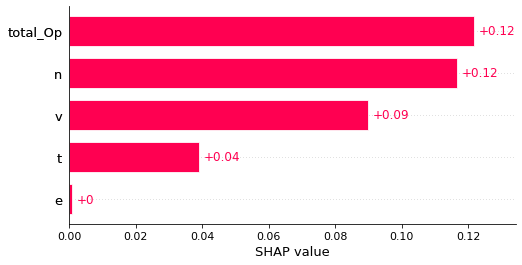

In [44]:
import matplotlib.pyplot as plt
shap.plots.bar(shap_values[file_to_be_explained_idx, :, 1], show=True)

## BreakDown

In [45]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Desktop/kaggle/jm1.csv")
imp_features = ['e', 't', 'v', 'n', 'total_Op', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['e', 't', 'v', 'n', 'total_Op']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [46]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [47]:
#necessary imports
from pyBreakDown.explainer import Explainer
from pyBreakDown.explanation import Explanation
#make explainer object
exp = Explainer(clf=our_rf_model, data= X_train, colnames=features)

In [48]:
#make explanation object that contains all information

explanation = exp.explain(observation=X_train.iloc[0,:].values,direction="up",useIntercept=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

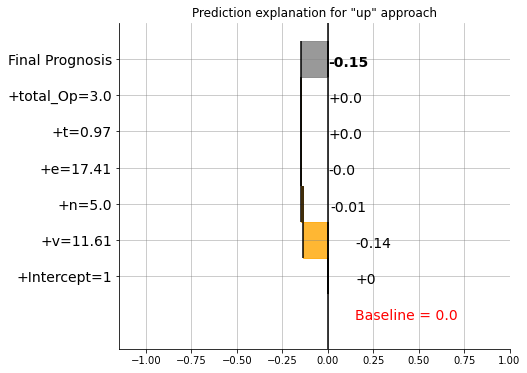

In [49]:
explanation.visualize()

## PyExplainer

In [84]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Desktop/kaggle/jm1.csv")
imp_features = ['e', 't', 'v', 'n', 'total_Op', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['e', 't', 'v', 'n', 'total_Op']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def train_test_split(df, frac=0.2):
    
    # get random sample 
    test = df.sample(frac=frac, axis=0)

    # get everything but the test sample
    train = df.drop(index=test.index)

    return train, test

class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [121]:
## try

## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/KaggleData/kaggle/jm1.csv")

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

def train_test_split(df, frac=0.2):
    
    # get random sample 
    test = df.sample(frac=frac, axis=0)

    # get everything but the test sample
    train = df.drop(index=test.index)

    return train, test

train_dataset, test_dataset = train_test_split(data)

train_dataset.to_csv("train_dataset.csv", index=False)
test_dataset.to_csv("test_dataset.csv", index=False)

train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")

outcome = 'defects'
features = ['e', 't', 'v', 'n', 'total_Op']

# OWN_COMMIT - # code ownership
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]


class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [110]:
rf_model

RandomForestClassifier(random_state=0)

In [123]:
X_train

e        t        v      n  total_Op
0         1.30     1.30     1.30    1.3       1.2
1         1.00     1.00     1.00    1.0       1.0
2     23029.10  1279.39  1134.13  198.0     112.0
3     74202.67  4122.37  4348.76  600.0     329.0
4     10297.30   572.07   599.12  126.0      76.0
...        ...      ...      ...    ...       ...
8699     17.41     0.97    11.61    5.0       3.0
8700   5694.85   316.38   470.65   95.0      51.0
8701   1770.86    98.38   241.48   52.0      30.0
8702   1069.68    59.43   129.66   30.0      19.0
8703   3154.67   175.26   272.63   58.0      31.0

[8704 rows x 5 columns]

In [124]:
X_test

e         t        v      n  total_Op
0          0.00      0.00     0.00    0.0       0.0
1       3640.00    202.22   208.00   52.0      31.0
2       1534.73     85.26   109.62   33.0      21.0
3     407298.30  22627.68  6861.30  985.0     625.0
4          0.00      0.00     0.00    0.0       0.0
...         ...       ...      ...    ...       ...
2171       0.00      0.00     0.00    0.0       0.0
2172   97131.51   5396.20  1334.22  291.0     187.0
2173      12.00      0.67     8.00    4.0       3.0
2174       0.00      0.00     0.00    0.0       0.0
2175       0.00      0.00     0.00    0.0       0.0

[2176 rows x 5 columns]

In [95]:
pd.Series(bool(y_test.loc[file_to_be_explained]), 
                                                      index = [file_to_be_explained],
                                                      name = outcome)

413    True
Name: defects, dtype: bool

In [103]:
rf_model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int8)

In [125]:
from pyexplainer.pyexplainer_pyexplainer import PyExplainer
file_to_be_explained = 5845
import numpy as np
np.random.seed(0)

pyexp = PyExplainer(X_train = X_train,
                           y_train = y_train,
                           indep = X_train.columns,
                           dep = outcome,
                           top_k_rules=5,
                           blackbox_model = rf_model)

# PyExplainer Step 2 - Generate the rule-based explanation of an instance to be explained
exp_obj = pyexp.explain(X_explain = X_test.loc[file_to_be_explained,:].to_frame().transpose(),
                        y_explain = pd.Series(bool(y_test.loc[file_to_be_explained]), 
                                                      index = [file_to_be_explained],
                                                      name = outcome),
                        search_function = 'crossoverinterpolation',
                        max_iter=1000,
                        max_rules=20,
                        random_state=0,
                        reuse_local_model=True)

# Print rule 
exp_obj['top_k_positive_rules'][:1]

# Please use the code below to visualise the generated PyExplainer explanation (What-If interactive visualisation).
pyexp.visualise(exp_obj, title="Why this file is predicted as defect-introducing?")


Output(layout=Layout(border='3px solid black'))

FloatSlider(value=0.0, continuous_update=False, description='#1 The value of e is more than 0.0', layout=Layou…

## PDP

In [55]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Desktop/kaggle/jm1.csv")
imp_features = ['e', 't', 'v', 'n', 'total_Op', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['e', 't', 'v', 'n', 'total_Op']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [56]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [57]:
import numpy as np
import pandas as pd
# sklearn version: v1.0.1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)
import matplotlib.pyplot as plt
import seaborn as sns


file_to_be_explained = 897

print(f'Explaining {file_to_be_explained} with PDP')

Explaining 897 with PDP


## Average Value of CountPath_Max

In [58]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [0], kind = 'average')

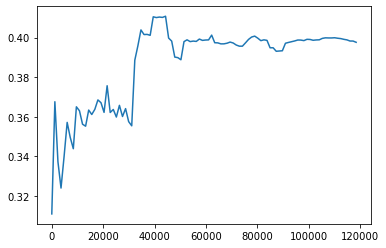

In [59]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of CountPath_Mean

In [60]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [1], kind = 'average')

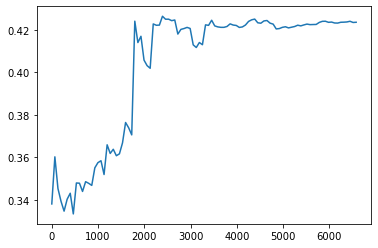

In [61]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of Del_lines

In [62]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [2], kind = 'average')

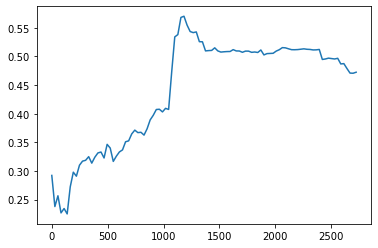

In [63]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of Added_lines

In [64]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [3], kind = 'average')

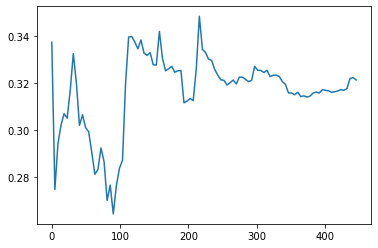

In [65]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of CountLine

In [66]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [4], kind = 'average')

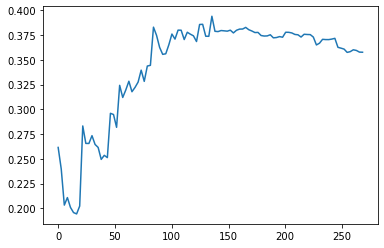

In [67]:
plt.plot(results['values'][0], results['average'][0])

## ICE

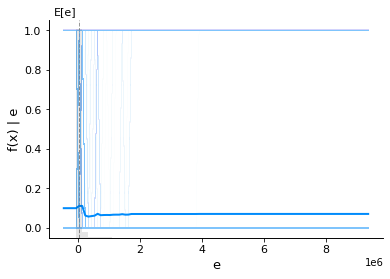

In [69]:
import subprocess
import sys
import importlib
import numpy
import shap

shap.plots.partial_dependence(
    "e", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

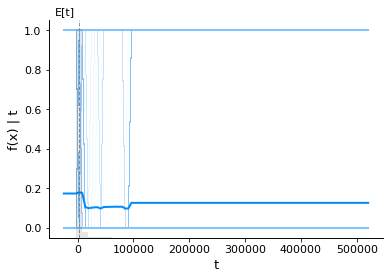

In [74]:
shap.plots.partial_dependence(
    "t", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

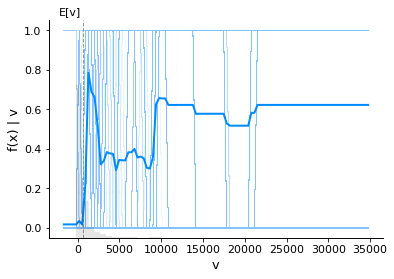

In [73]:
shap.plots.partial_dependence(
    "v", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

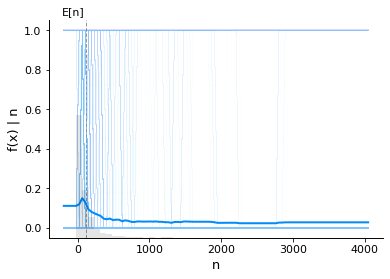

In [72]:
shap.plots.partial_dependence(
    "n", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

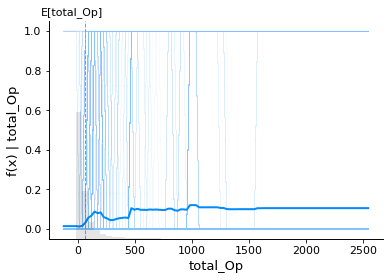

In [71]:
shap.plots.partial_dependence(
    "total_Op", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)